# Can We Predict Who Will Default On A Loan?
## by Leslie Culliton

## Preliminary Wrangling

The data for this analysis was provided by Prosper. It contains 81 variables that are tracked for all of these loans. The following analysis will explore variables that may affect loan status.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#Read dataset
df = pd.read_csv('prosperLoanData.csv')

In [9]:
#View variable information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [10]:
#Data snapshot
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,09:29.3,C,36,Completed,8/14/2009 0:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,28:07.9,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,00:47.1,HR,36,Completed,12/17/2009 0:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,02:35.0,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,38:39.1,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
#Create a new dataset containing the variables that will be investigated
loandata = df[['LoanStatus', 'BorrowerRate', 'EmploymentStatus', 'CreditScoreRangeUpper', 'CreditScoreRangeLower', 
               'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'IncomeRange', 'LoanOriginalAmount', 'MonthlyLoanPayment',
              'DelinquenciesLast7Years']].copy()

In [4]:
#New dataset snapshot
loandata.head()

,LoanStatus,BorrowerRate,EmploymentStatus,CreditScoreRangeUpper,CreditScoreRangeLower,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,IncomeRange,LoanOriginalAmount,MonthlyLoanPayment,DelinquenciesLast7Years
0,Completed,0.1580,Self-employed,659.0,640.0,1,24,"$25,000-49,999",9425,330.43,4.0
1,Current,0.0920,Employed,699.0,680.0,13,389,"$50,000-74,999",10000,318.93,0.0
2,Completed,0.2750,Not available,499.0,480.0,0,0,Not displayed,3001,123.32,0.0
3,Current,0.0974,Employed,819.0,800.0,7,115,"$25,000-49,999",10000,321.45,14.0
4,Current,0.2085,Employed,699.0,680.0,6,220,"$100,000+",15000,563.97,0.0


In [13]:
#View variable information
loandata.describe()

,BorrowerRate,CreditScoreRangeUpper,CreditScoreRangeLower,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,LoanOriginalAmount,MonthlyLoanPayment,DelinquenciesLast7Years
count,113937.000000,113346.000000,113346.000000,113937.00000,113937.000000,113937.00000,113937.000000,112947.000000
mean,0.192764,704.567731,685.567731,6.96979,398.292161,8337.01385,272.475783,4.154984
std,0.074818,66.458275,66.458275,4.63097,447.159711,6245.80058,192.697812,10.160216
min,0.000000,19.000000,0.000000,0.00000,0.000000,1000.00000,0.000000,0.000000
25%,0.134000,679.000000,660.000000,4.00000,114.000000,4000.00000,131.620000,0.000000
50%,0.184000,699.000000,680.000000,6.00000,271.000000,6500.00000,217.740000,0.000000
75%,0.250000,739.000000,720.000000,9.00000,525.000000,12000.00000,371.580000,3.000000
max,0.497500,899.000000,880.000000,51.00000,14985.000000,35000.00000,2251.510000,99.000000


In [14]:
#Variable information
loandata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
LoanStatus                     113937 non-null object
BorrowerRate                   113937 non-null float64
EmploymentStatus               111682 non-null object
CreditScoreRangeUpper          113346 non-null float64
CreditScoreRangeLower          113346 non-null float64
OpenRevolvingAccounts          113937 non-null int64
OpenRevolvingMonthlyPayment    113937 non-null int64
IncomeRange                    113937 non-null object
LoanOriginalAmount             113937 non-null int64
MonthlyLoanPayment             113937 non-null float64
DelinquenciesLast7Years        112947 non-null float64
dtypes: float64(5), int64(3), object(3)
memory usage: 9.6+ MB


### What is the structure of your dataset?

> The dataset contains 113,937 entries with 81 columns. Because there were so many columns, a new dataframe was created containing only 9 of the columns that were of interest.

### What is/are the main feature(s) of interest in your dataset?

> This analysis will primarily focus on the factors that affect how much an individual can borrow and chances of default.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Assumptions

Credit score, salary, revolving credit and employment status affect the amount a person can borrow. Loan default is affected by amount of debt and number of active revolving credit accounts.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

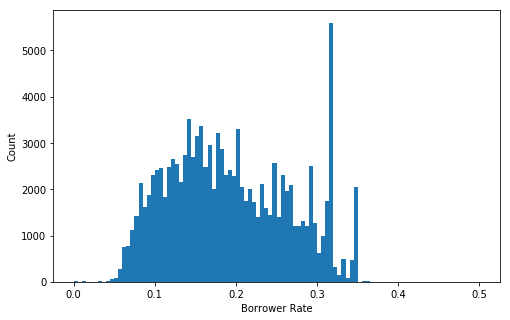

In [15]:
#Look at the range of interst rates for these loans.
binsize = 0.005
bins = np.arange(0, loandata['BorrowerRate'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandata, x = 'BorrowerRate', bins = bins)
plt.xlabel('Borrower Rate')
plt.ylabel('Count')
plt.show();

The majority of loans have interest rates of 0.1 - 0.3. There is a large number of loans having interest rates of about 3.25. 

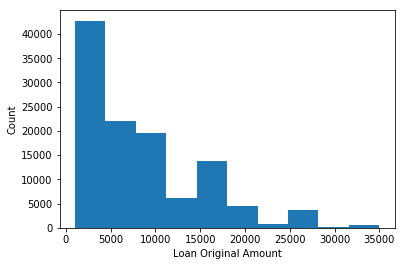

In [18]:
#Look at the range of loan amounts in this data set.
plt.hist(data = loandata, x = 'LoanOriginalAmount')
plt.xlabel('Loan Original Amount')
plt.ylabel('Count')
plt.show();

Most of the loans in this data set are less than $10,000.

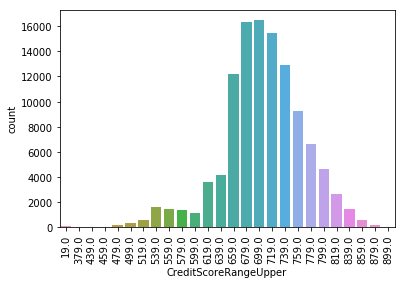

In [25]:
#Credit Score range of the loan recipients.
sb.countplot(data = loandata, x = 'CreditScoreRangeUpper')
plt.xticks(rotation = 90)
plt.show();

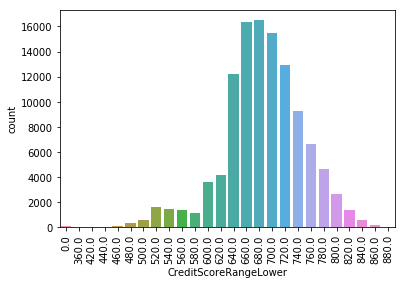

In [26]:
#Credit score range of the recipients.
sb.countplot(data = loandata, x = 'CreditScoreRangeLower')
plt.xticks(rotation = 90)
plt.show();

The majority of the loans are given to individuals with credit scores 600 or above. It appears that there is an error in the credit score range, as the minimum in the upper range is 19.

In [15]:
loandata.CreditScoreRangeUpper.max()

899.0

In [18]:
loandata.CreditScoreRangeUpper.min()

19.0

In [19]:
loandata.OpenRevolvingAccounts.max()

51

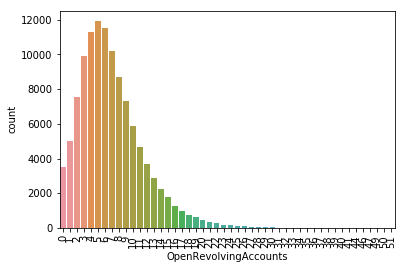

In [27]:
#The number of open revolving accounts of each recipient.
sb.countplot(data = loandata, x = 'OpenRevolvingAccounts')
plt.xticks(rotation = 90)
plt.show();

The majority of loans are given to people with few open revolving accounts.

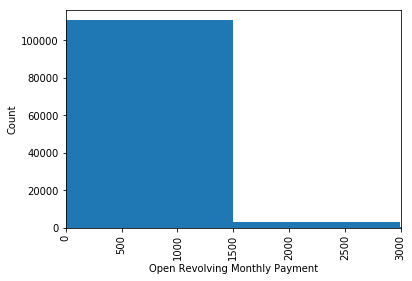

In [28]:
#Monthly payment obligations prior to loan.
plt.hist(data = loandata, x = 'OpenRevolvingMonthlyPayment')
plt.xlim(0, 3000)
plt.xlabel('Open Revolving Monthly Payment')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show();

Most of the loan recipients had open revolving monthly payments of less than $1,500.

In [22]:
loandata.OpenRevolvingMonthlyPayment.max()

14985

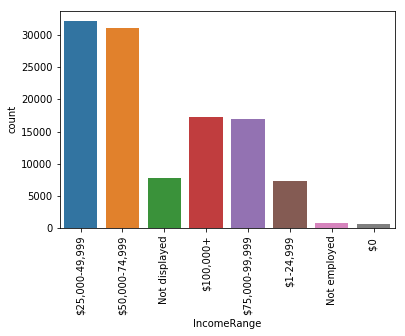

In [29]:
#Income range of loan recipients.
sb.countplot(data = loandata, x = 'IncomeRange')
plt.xticks(rotation = 90);

Most of the loans were borrowed by individuals with income amounts $25,000 - $75,000. There are few loans borrowed by individuals with income less than $2,5000.

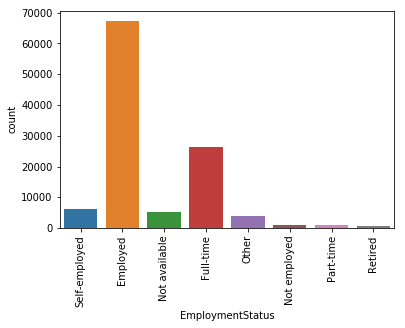

In [30]:
#Employment status of loan recipients.
sb.countplot(data = loandata, x = 'EmploymentStatus')
plt.xticks(rotation = 90);

The majority of loan recipients were employed.

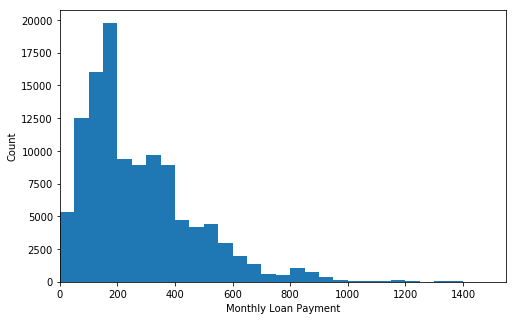

In [32]:
#Monthly loan payments
binsize = 50
bins = np.arange(0, loandata['MonthlyLoanPayment'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = loandata, x = 'MonthlyLoanPayment', bins = bins)
plt.xlim(0, 1550, 250)
plt.xlabel('Monthly Loan Payment')
plt.ylabel('Count')
plt.show();

Most monthly payments are around $200 - $500. There are some that are much higher.

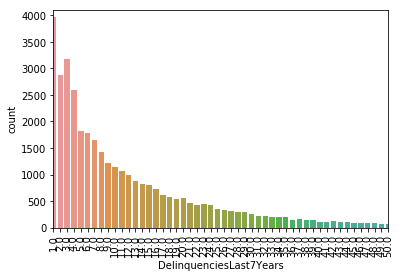

In [33]:
#Past account delinquencies of loan recipients.
sb.countplot(data = loandata, x = 'DelinquenciesLast7Years')
plt.xlim(1, 50)
plt.ylim(0, 4100)
plt.xticks(rotation = 90);

The data for delinquencies are skewed right. More loans were borrowed by people with few delinquencies.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There were no surprises in the data when looking at the individual variables. Borrower rates were were clustered between 0.1 and 0.3. Most loans were provided to individuals who were employed, had high credit scores and income ranges, low numbers of open revolving accounts and delinquencies, and low monthly payment obligations prior to loan origination. 

A new dataset was created using only 10 of the 81 variables.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The loan amounts were fairly low, with most falling below $10,000. 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

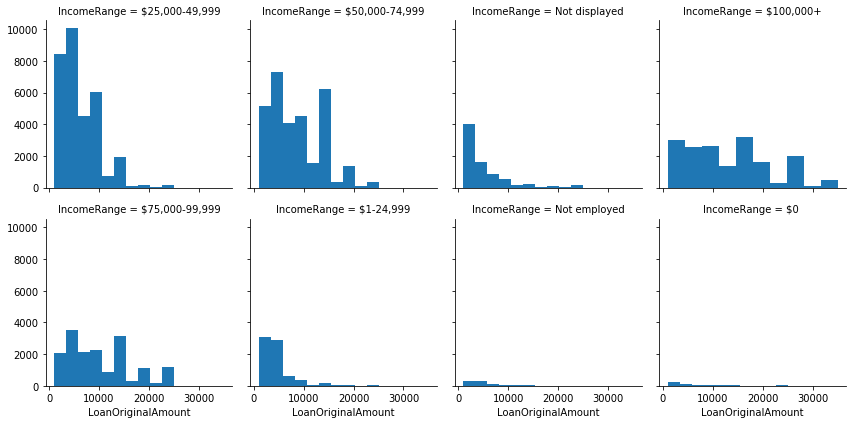

In [31]:
#A look at how income affects loan amount.
g = sb.FacetGrid(data = df, col = 'IncomeRange', col_wrap = 4)
g.map(plt.hist, "LoanOriginalAmount");

The greater an individual's income, the more money he or she can borrow. Very few loans were offered to individuals with no or low income.

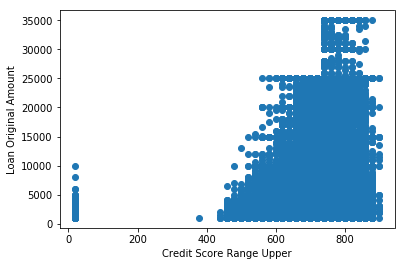

In [35]:
#How credit score affects loan amount.
plt.scatter(data = loandata, x = 'CreditScoreRangeUpper', y = 'LoanOriginalAmount')
plt.xlabel('Credit Score Range Upper')
plt.ylabel('Loan Original Amount');

This plot indicates that larger amounts were loaned to individuals with higher credit scores.

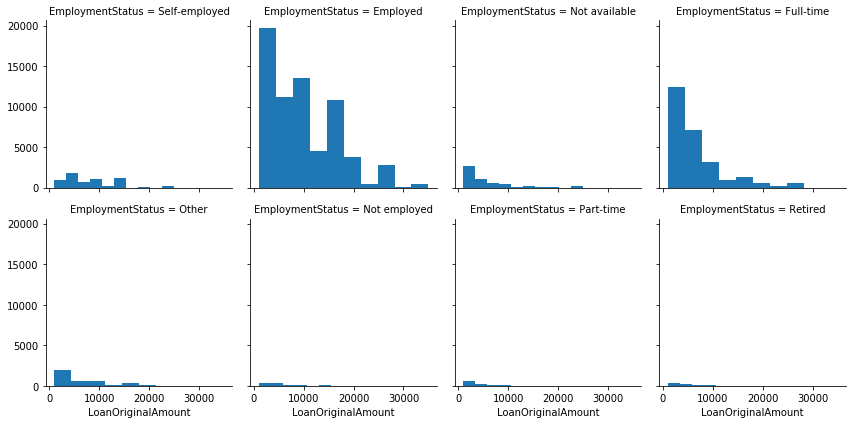

In [36]:
#How employment affects loan amount.
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', col_wrap = 4)
g.map(plt.hist, "LoanOriginalAmount");

Most loans were offered to individuals who are employed. Loans to unemployed, part-time, or retired individuals were lower than full-time employed persons.

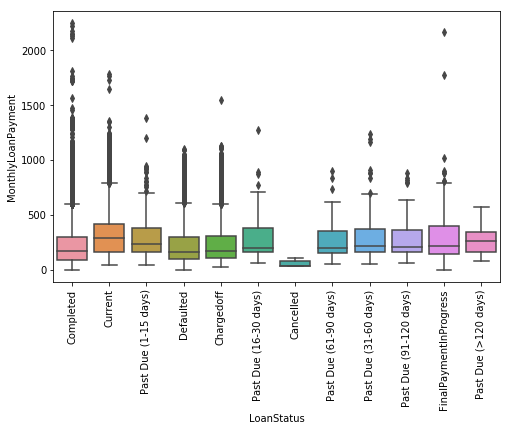

In [46]:
#How monthly loan payment affects loan status.

plt.figure(figsize=[8, 5])
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'MonthlyLoanPayment')
plt.xticks(rotation = 90);

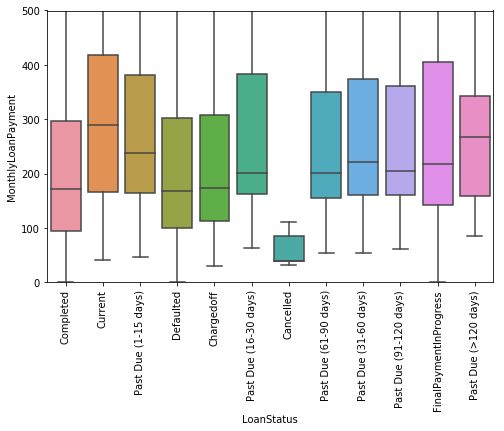

In [47]:
plt.figure(figsize=[8, 5])
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'MonthlyLoanPayment')
plt.ylim(0, 500)
plt.xticks(rotation = 90);

This above plots show that higher monthly loan payments are indicative of borrowers being late on payments or defaulting all together. 

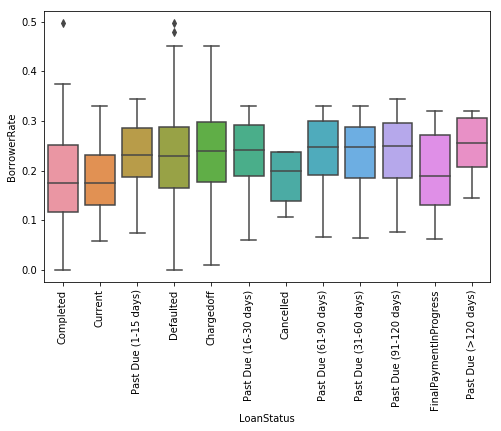

In [50]:
#How borrower rate affects loan status.

plt.figure(figsize=[8, 5])
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'BorrowerRate')
plt.xticks(rotation = 90);


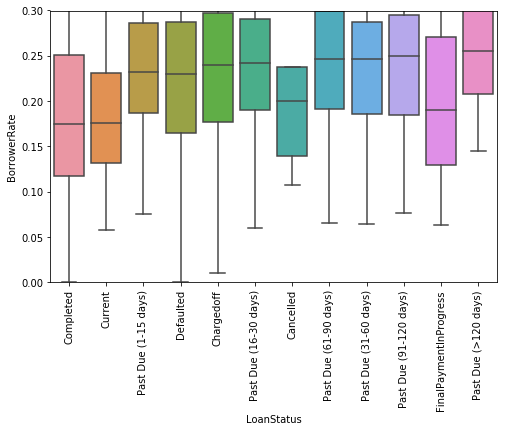

In [51]:

plt.figure(figsize=[8, 5])
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'BorrowerRate')
plt.ylim(0, 0.3)
plt.xticks(rotation = 90);

The above plots show that interest rate does have a negative affect on loan status as the rate increases.

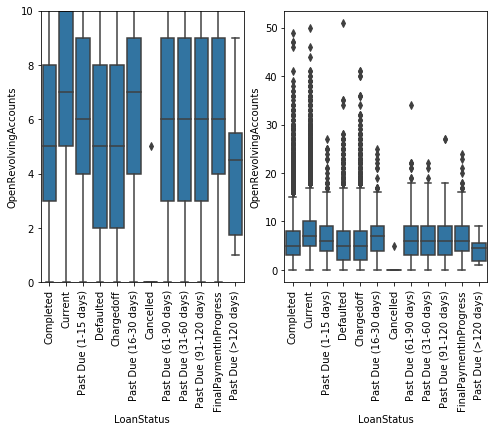

In [52]:
#How the number of open accounts affects loan status.
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'OpenRevolvingAccounts', color = base_color)
plt.ylim(0, 10)
plt.xticks(rotation = 90);

plt.subplot(1, 2, 2)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'OpenRevolvingAccounts', color = base_color)
plt.xticks(rotation = 90);

The above plots indicate that the higher number of open revolving accounts, the greater the likelihood that an account will default. The second plot shows that there is a high number of outliers in the upper range of the plot. Interestingly, a greater amount of the completed and current loans appear to have a high number of revolving accounts than the past due loans.

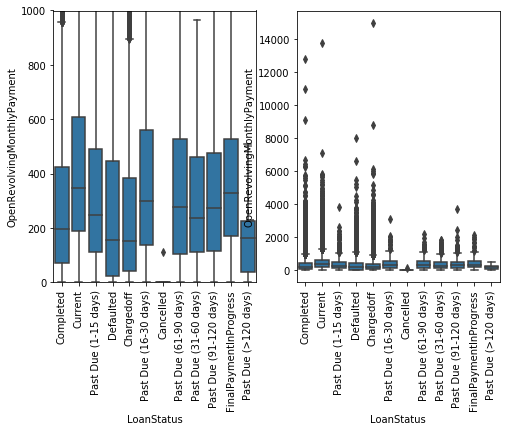

In [55]:
#How the monthly payment obigation prior to loan origination affects loan status.
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'OpenRevolvingMonthlyPayment', color = base_color)
plt.ylim(0, 1000)
plt.xticks(rotation = 90);

plt.subplot(1, 2, 2)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'OpenRevolvingMonthlyPayment', color = base_color)
plt.xticks(rotation = 90);

The above plots indicate that the higher the monthly payments, the greater the likelihood that an account will 
default. The second plot shows that there is a high number of outliers in the upper range of the plot. 

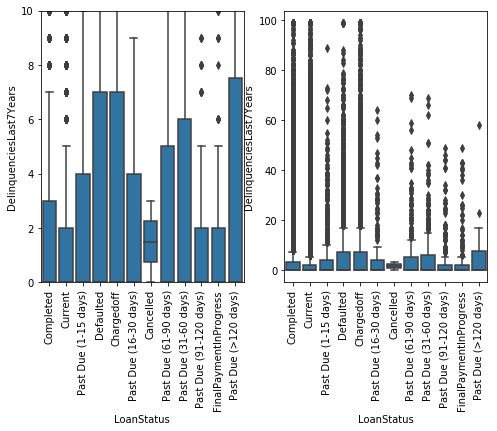

In [57]:
#How past account deliquencies affect loan status.
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'DelinquenciesLast7Years', color = base_color)
plt.ylim(0, 10)
plt.xticks(rotation = 90);

plt.subplot(1, 2, 2)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'DelinquenciesLast7Years', color = base_color)
plt.xticks(rotation = 90);

The above plot shows that previous deliquencies on accounts are an indicator that a loan may default.

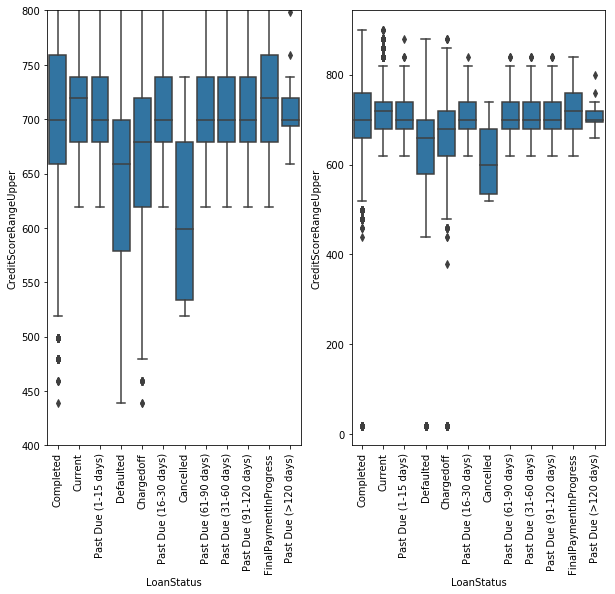

In [58]:
#How credit score affects loan status.
plt.figure(figsize=[10, 8])
base_color = sb.color_palette()[0]

plt.subplot(1, 2, 1)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'CreditScoreRangeUpper', color = base_color)
plt.ylim(400, 800)
plt.xticks(rotation = 90);

plt.subplot(1, 2, 2)
sb.boxplot(data = loandata, x = 'LoanStatus', y = 'CreditScoreRangeUpper', color = base_color)
plt.xticks(rotation = 90);


The above plots show that credit score is not a good indicator of loan status.

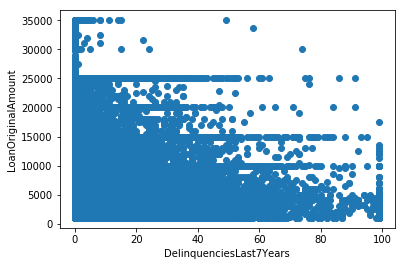

In [59]:
#How past delinquencies affect loan amount.
plt.scatter(data = loandata, x = 'DelinquenciesLast7Years', y = 'LoanOriginalAmount')
plt.xlabel('DelinquenciesLast7Years')
plt.ylabel('LoanOriginalAmount');

The above plot indicates that the lower the number of delinquencies, the higher the loan amount.

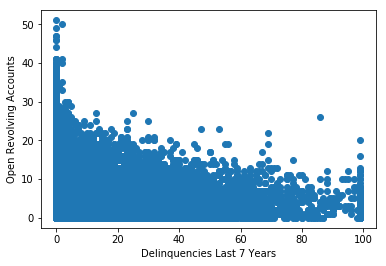

In [71]:
#Relationship between number of revolving accounts and past delinquencies.
plt.scatter(data = loandata, x = 'DelinquenciesLast7Years', y = 'OpenRevolvingAccounts')
plt.xlabel('Delinquencies Last 7 Years')
plt.ylabel('Open Revolving Accounts');

The above plot shows a slight negative correlation between open revolving accounts and past delinquencies.

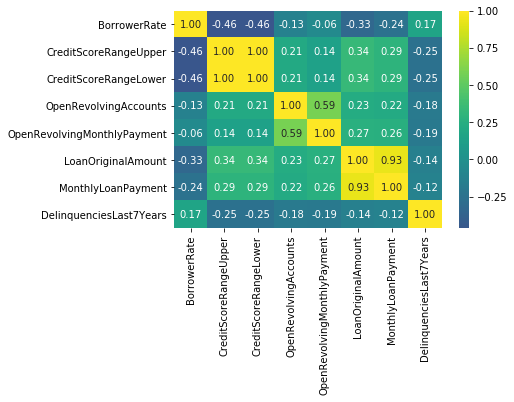

In [72]:
sb.heatmap(loandata.corr(), annot = True, fmt = '.2f', cmap = 'viridis', center = 0);

There is not a high correlation between any of the variables in the loandata dataset.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

The bivariate plots show that income range, employment status, and credit score affect loan amount. The number of revolving accounts, monthly payments, and past delinquencies are indicators that loans may default. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The number of open revolving accounts affects monthly loan payment. This makes sense, as number of revolving accounts is an indicator of loan default.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

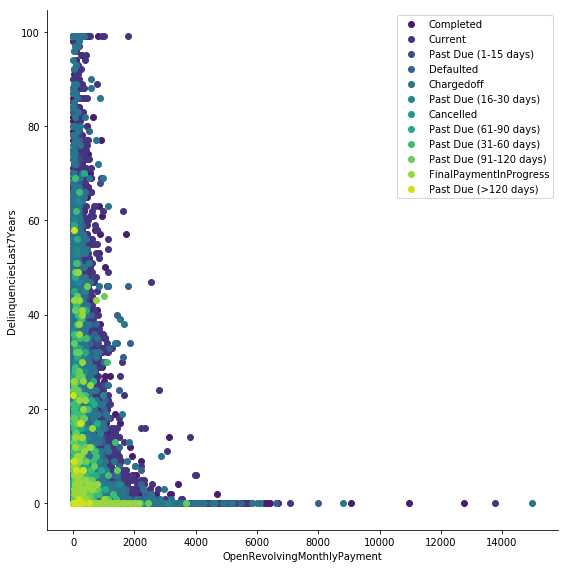

In [80]:
#How delinquecies and monthly payments affect loan status.
g = sb.FacetGrid(data = loandata, hue = 'LoanStatus', size = 8,
                 palette = 'viridis')
g.map(plt.scatter, 'OpenRevolvingMonthlyPayment', 'DelinquenciesLast7Years')
plt.legend()
plt.show();

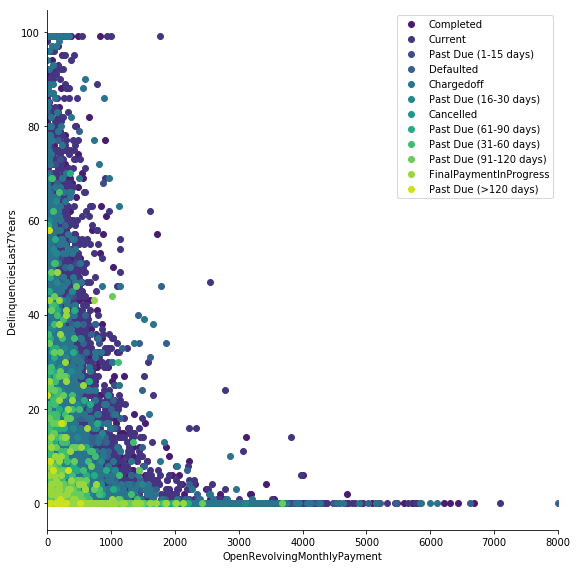

In [77]:
g = sb.FacetGrid(data = loandata, hue = 'LoanStatus', size = 8,
                 palette = 'viridis')
g.map(plt.scatter, 'OpenRevolvingMonthlyPayment', 'DelinquenciesLast7Years')
plt.xlim(0, 8000)
plt.legend()
plt.show();

Although both high number of delinquencies and high value of monthly payments have a negative affect on loan status in general, it appears that individuals with both a high number of past delinquecies are less likely to have high monthly payments. And, individuals with either high numbers of past delinquencies or high monthly payments are less likely to default.

C:\Users\Leslie\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


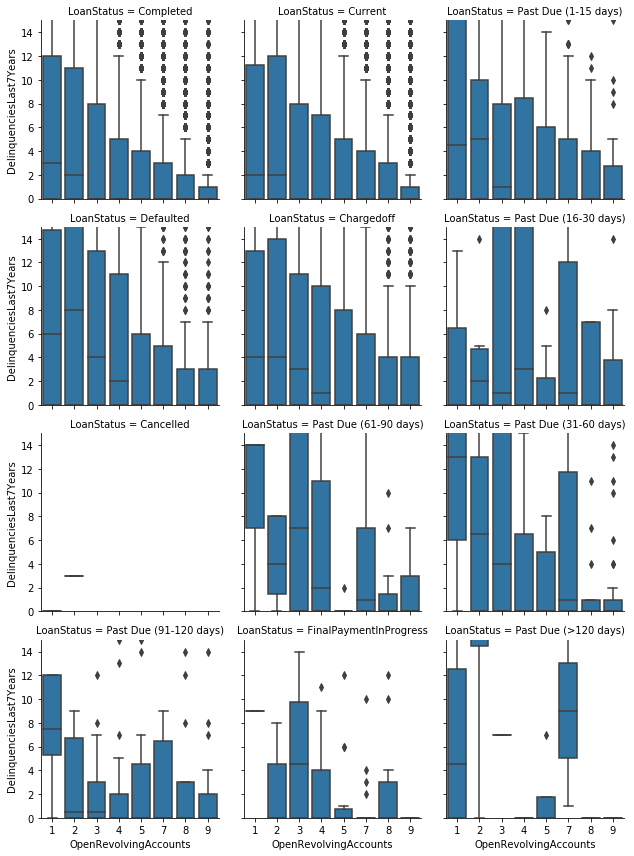

In [6]:
#Another view of monthly payments and delinquencies
g = sb.FacetGrid(data = loandata, col = 'LoanStatus', col_wrap = 3)
g.map(sb.boxplot, 'OpenRevolvingAccounts', 'DelinquenciesLast7Years')
plt.ylim(0, 15)
plt.show();

The plots above confirm what the previous scatterplots showed. Individuals with high numbers of past delinquencies or high numbers of open revolving accounts are less likely to default.

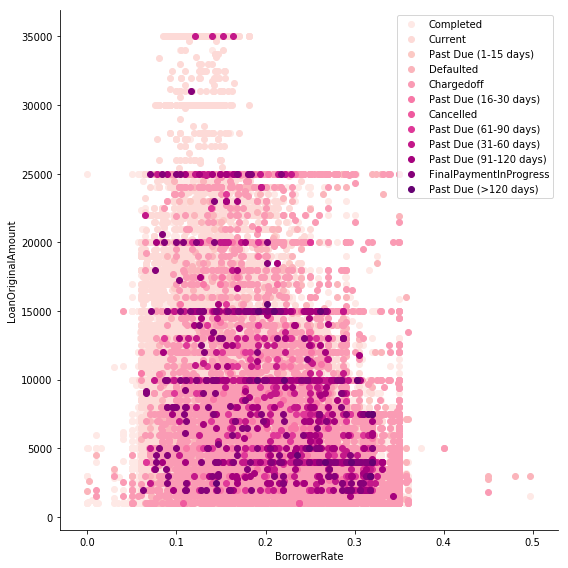

In [82]:
#Affect of loan amount combined with borrower rate.
g = sb.FacetGrid(data = loandata, hue = 'LoanStatus', size = 8,
                 palette = 'RdPu')
g.map(plt.scatter, 'BorrowerRate', 'LoanOriginalAmount')
plt.legend()
plt.show();

The above plot shows that higher borrower rate has some effect on loan default. However, there are fewer past due and defaulted
loans for the larger loans. Note that the larger the loan amount, the lower the borrower rate.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

There were no surprises when the individual variables (Loan Status, Borrower Rate, Employment Status, Credit Score Range Upper, Credit Score Range Lower, Open Revolving Accounts, Open Revolving Monthly Payment, Income Range, Loan Original Amount, Monthly Loan Payment, and Delinquencies Last 7 Years) were plotted to show their behavior over the data set. A greater number of loans were created for amounts under 10,000 than for amounts higher than that. Credit score range across the dataset is concentrated between 600 and 800. Loans were primarily created for people who were employed and most loans were for borrowers who made between 25,000 and 75,000. 

Additionally, when looking at affects of other variables on loan amount and loan default, the data behaved as expected. Higher incomes led to higher loan amounts, higher credit scores translated to lower borrower rates, and greater numbers of past delinquencies were an indicator of future default.

### Were there any interesting or surprising interactions between features?

Interestingly, the data did not behave as expected when past deliquencies were plotted with monthly payment amounts prior to loan origination. These variables have a slightly negative correlation. When plotted with loan status, individuals with few past deliquencies and low loan amounts were more likely to be past due or to default than were individuals with either high incidents of delinquencies or high monthly payments. Also, there are lower rates of past due payments or default when the loan amount is high and the borrower rate is low.